## Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Invistico_Airline.csv', sep=',')

In [3]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Análise dos Dados

In [4]:
data.shape

(129880, 23)

(129880, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### Análise das Entradas por Coluna

In [7]:
counts_type_travel = data['Type of Travel'].value_counts()
counts_type_travel

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [8]:
count_customer_type = data['Customer Type'].value_counts()
count_customer_type

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [9]:
count_travel_type = data['Type of Travel'].value_counts()
count_travel_type

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [10]:
count_class = data['Class'].value_counts()
count_class

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

### Transformação dos dados para binário

In [11]:
# Class needs to be int (0=Business; 1=Eco, 2=Eco Plus)
data.loc[data['Class'] == 'Business', 'Class'] = '0'
data.loc[data['Class'] == 'Eco', 'Class'] = '1'
data.loc[data['Class'] == 'Eco Plus', 'Class'] = '2'

In [12]:
# Satisfaction needs to be binary (0=dissatisfied; 1=satisfied)
data.loc[data['satisfaction'] == 'satisfied', 'satisfaction'] = '1'
data.loc[data['satisfaction'] == 'dissatisfied', 'satisfaction'] = '0'

In [13]:
# Gender needs to be binary (0=female; 1=male)
data.loc[data['Gender'] == 'Female', 'Gender'] = '0'
data.loc[data['Gender'] == 'Male', 'Gender'] = '1'

In [14]:
# Customer Type needs to be binary (0=Loyal; 1=Disloyal)
data.loc[data['Customer Type'] == 'Loyal Customer', 'Customer Type'] = '0'
data.loc[data['Customer Type'] == 'disloyal Customer', 'Customer Type'] = '1'

In [15]:
# Travel Type needs to be binary (0=Business travel; 1=Personal Travel)
data.loc[data['Type of Travel'] == 'Business travel', 'Type of Travel'] = '0'
data.loc[data['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = '1'
data['Type of Travel'].value_counts()

Type of Travel
0    89693
1    40187
Name: count, dtype: int64

Type of Travel
0    89693
1    40187
Name: count, dtype: int64

### Estatísticas Descritivas

In [6]:
data.describe().round(2)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1981.41,2.84,2.99,2.85,2.99,3.25,3.38,3.52,3.47,3.47,3.49,3.70,3.34,3.71,3.35,14.71,15.09
std,15.12,1027.12,1.39,1.53,1.44,1.31,1.32,1.35,1.31,1.31,1.27,1.29,1.16,1.26,1.15,1.30,38.07,38.47
min,7.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,1359.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,1925.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,0.00,0.00
75%,51.00,2544.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,6951.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1981.41,2.84,2.99,2.85,2.99,3.25,3.38,3.52,3.47,3.47,3.49,3.70,3.34,3.71,3.35,14.71,15.09
std,15.12,1027.12,1.39,1.53,1.44,1.31,1.32,1.35,1.31,1.31,1.27,1.29,1.16,1.26,1.15,1.30,38.07,38.47
min,7.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,1359.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,1925.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,0.00,0.00
75%,51.00,2544.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,6951.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [27]:
# Data Correlation
data_corr = data.corr().round(4)
data_corr = data_corr.iloc[:, 0].sort_values(ascending=True)
data_corr

Customer Type                       -0.2926
Class                               -0.2789
Gender                              -0.2122
Type of Travel                      -0.1092
Arrival Delay in Minutes            -0.0807
Departure Delay in Minutes          -0.0739
Flight Distance                     -0.0392
Departure/Arrival time convenient   -0.0155
Gate location                       -0.0121
Age                                  0.1180
Food and drink                       0.1207
Inflight wifi service                0.2271
Seat comfort                         0.2424
Cleanliness                          0.2593
Baggage handling                     0.2603
Checkin service                      0.2662
Leg room service                     0.3049
Online boarding                      0.3381
On-board service                     0.3520
Online support                       0.3901
Ease of Online booking               0.4318
Inflight entertainment               0.5235
satisfaction                    

Customer Type                       -0.2926
Class                               -0.2789
Gender                              -0.2122
Type of Travel                      -0.1092
Arrival Delay in Minutes            -0.0807
Departure Delay in Minutes          -0.0739
Flight Distance                     -0.0392
Departure/Arrival time convenient   -0.0155
Gate location                       -0.0121
Age                                  0.1180
Food and drink                       0.1207
Inflight wifi service                0.2271
Seat comfort                         0.2424
Cleanliness                          0.2593
Baggage handling                     0.2603
Checkin service                      0.2662
Leg room service                     0.3049
Online boarding                      0.3381
On-board service                     0.3520
Online support                       0.3901
Ease of Online booking               0.4318
Inflight entertainment               0.5235
satisfaction                    

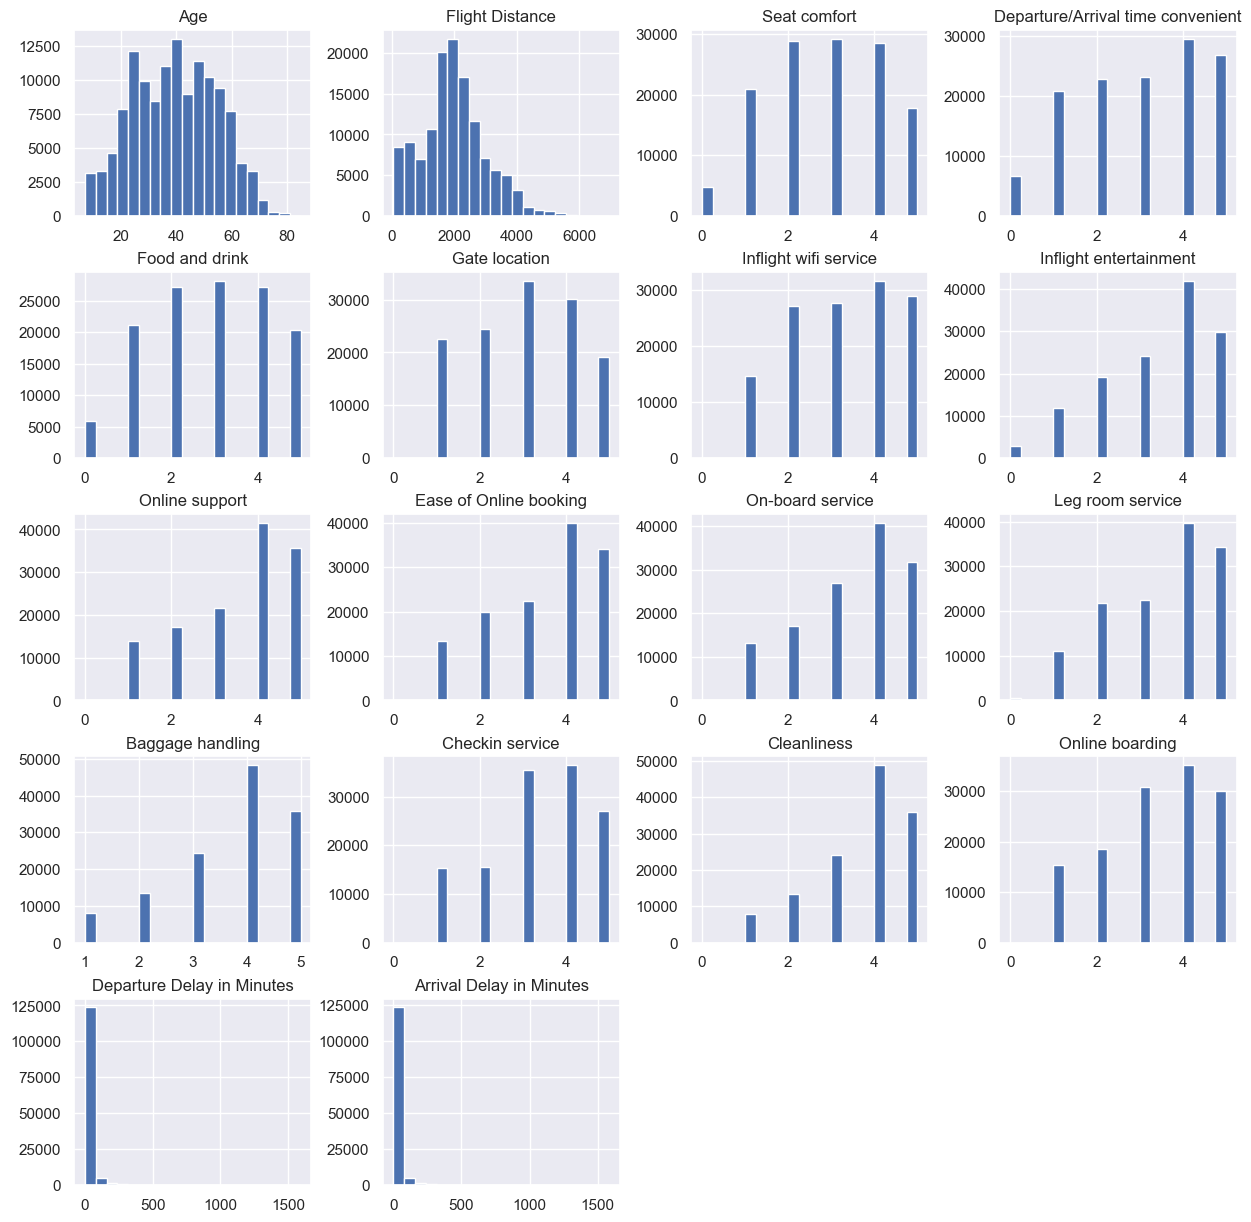

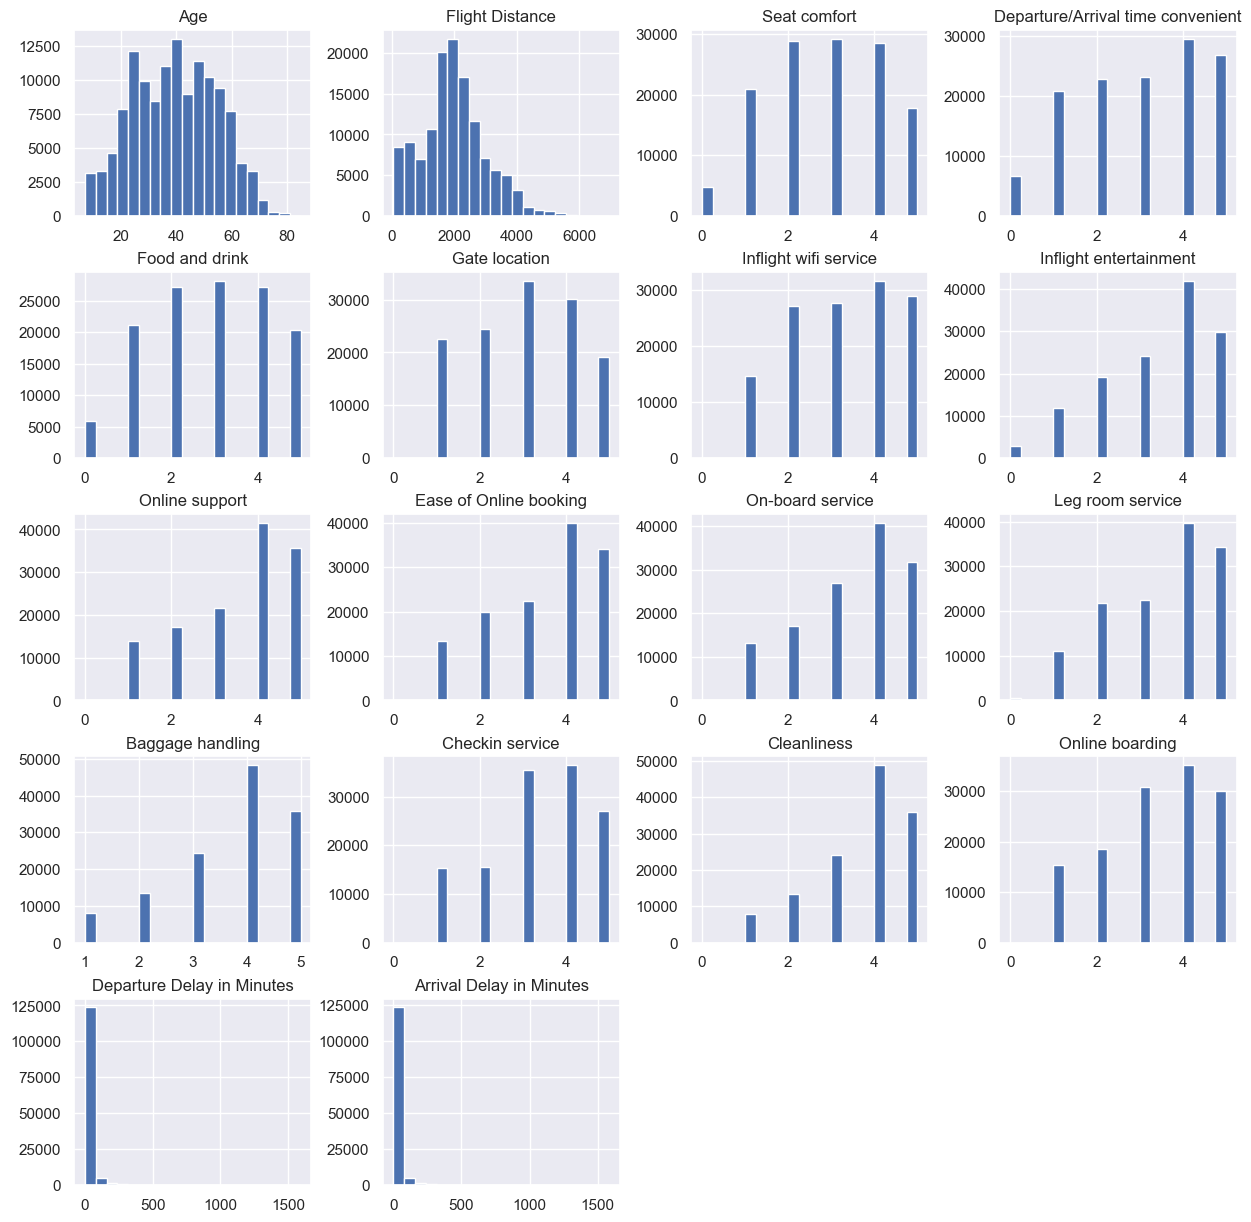

In [16]:
sns.set(font_scale=1.0, rc={'figure.figsize': (15,15)})
axis = data.hist(bins=20)

In [17]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot')

Text(0.5, 1.0, 'Boxplot')

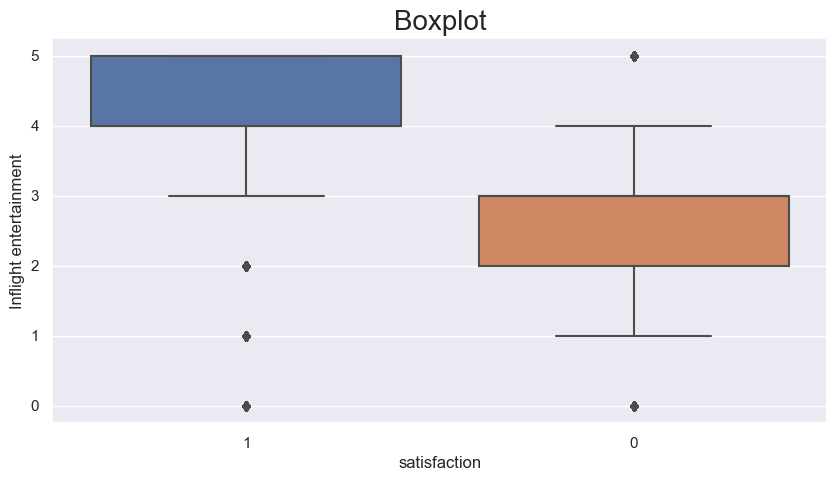

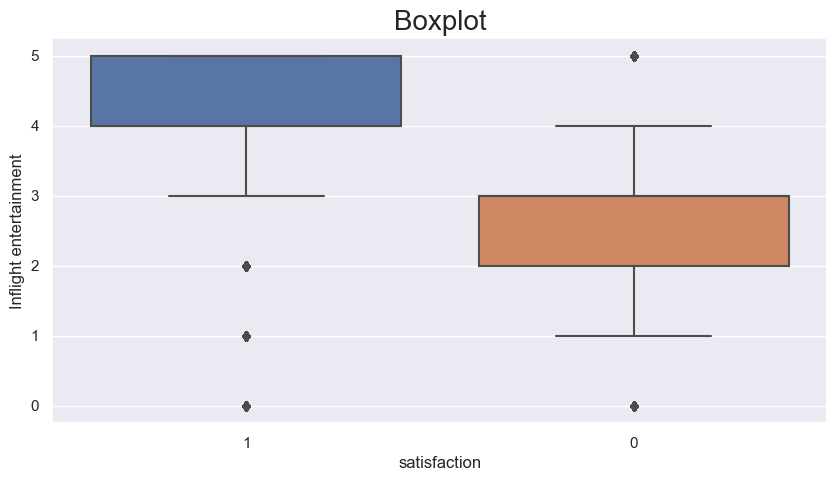

In [18]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='Inflight entertainment')
ax.set_title('Boxplot', fontsize=20)

Text(0.5, 1.0, 'Boxplot')

Text(0.5, 1.0, 'Boxplot')

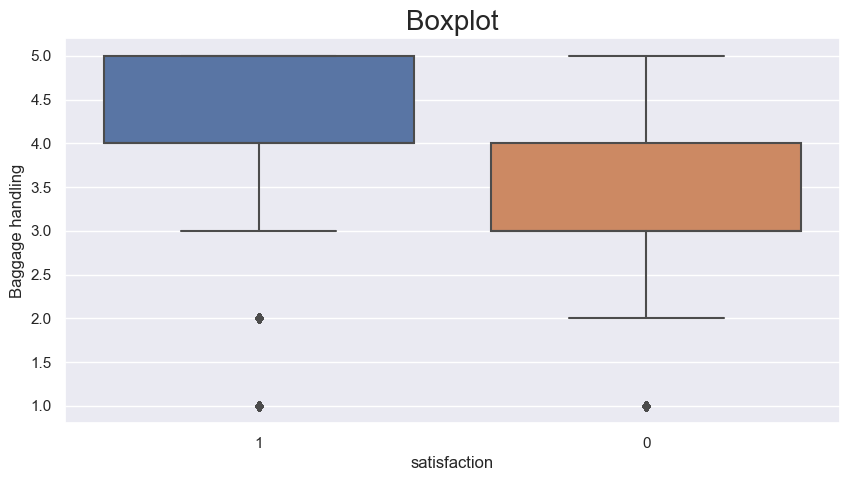

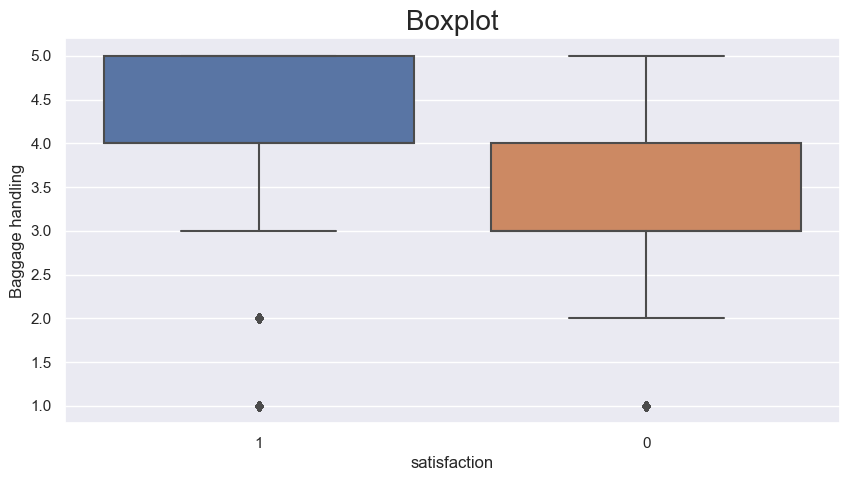

In [19]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='Baggage handling')
ax.set_title('Boxplot', fontsize=20)

Text(0.5, 1.0, 'Boxplot')

Text(0.5, 1.0, 'Boxplot')

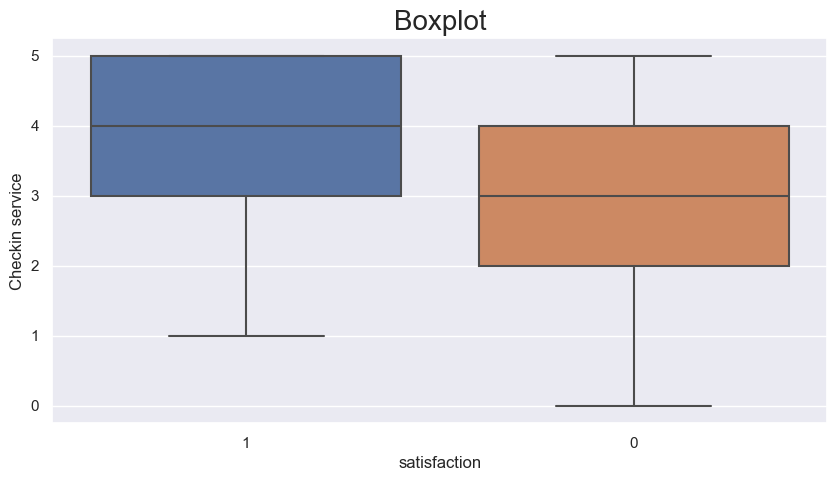

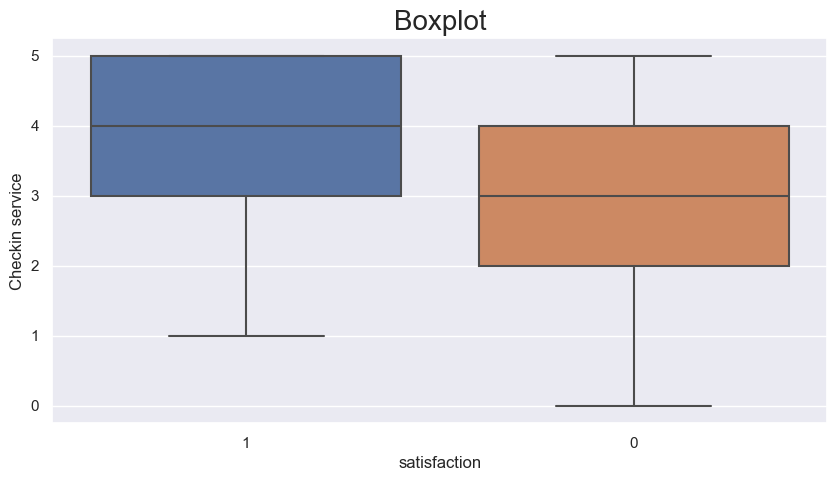

In [20]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='Checkin service')
ax.set_title('Boxplot', fontsize=20)

Text(0.5, 1.0, 'Boxplot')

Text(0.5, 1.0, 'Boxplot')

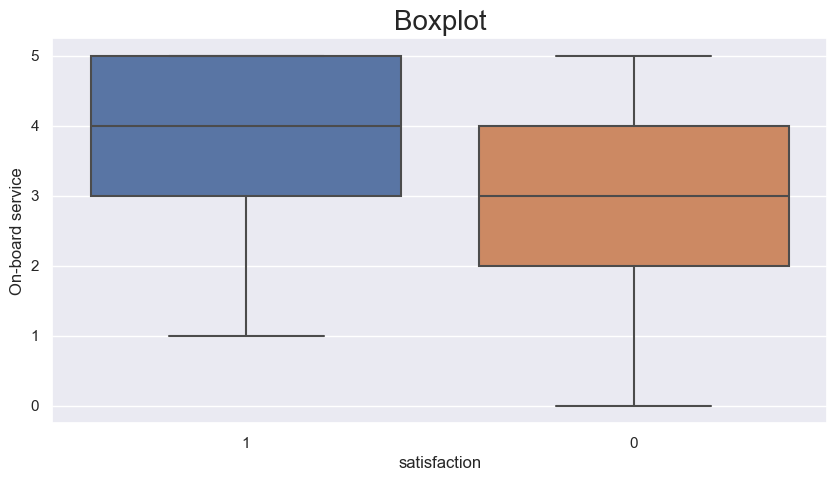

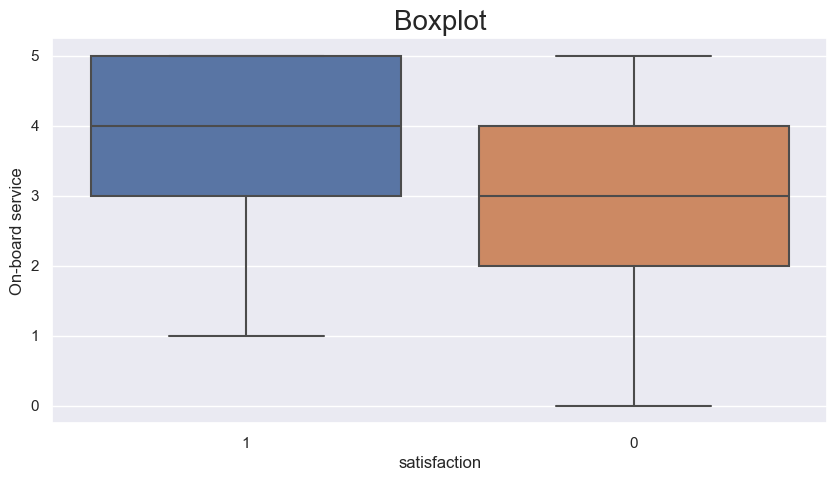

In [21]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='On-board service')
ax.set_title('Boxplot', fontsize=20)